In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
!pip install sweetviz
import sweetviz as sv


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Applied machine learning/housing_1.csv")
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  int64  
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None 

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880             129   
1    -122.22     37.86                  21         7099            1106   
2    -122

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Visualization
report = sv.analyze(df)

report.show_html("./report.html")

In [ ]:
#Convert the categorical variable (ocean_proximity ) to dummy variables
df = pd.get_dummies(df, drop_first=False)

In [ ]:
#Drop the dependent variable/feature
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [ ]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Running the Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicting the house price using random forest model
y_pred = rf_model.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('Test MAE score:', mean_absolute_error(y_test, y_pred))

Test R2 score: 0.8262504702161796
Test MSE score: 2376056231.2846966
Test MAE score: 31720.791162221678


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

longitude                     0.108992
latitude                      0.104619
housing_median_age            0.050451
total_rooms                   0.023519
total_bedrooms                0.022254
population                    0.032720
households                    0.018916
median_income                 0.485008
ocean_proximity_<1H OCEAN     0.003519
ocean_proximity_INLAND        0.142814
ocean_proximity_ISLAND        0.000337
ocean_proximity_NEAR BAY      0.001275
ocean_proximity_NEAR OCEAN    0.005576
dtype: float64


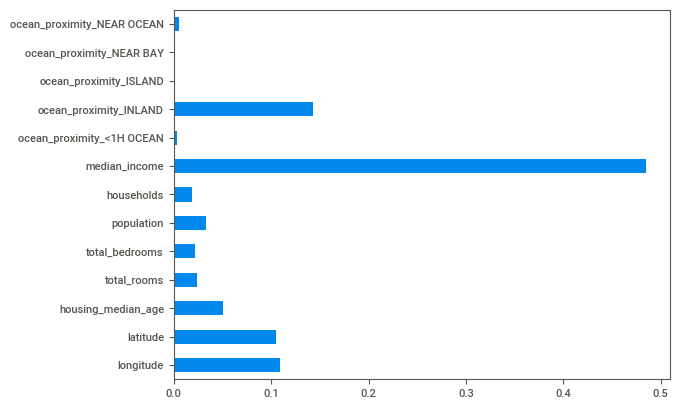

In [ ]:
#Showing the Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

OOB R2 score: 0.818217579595907
OOB MSE score: 2406231801.2148576
OOB MAE score: 31695.668361494972
longitude                     0.108992
latitude                      0.104619
housing_median_age            0.050451
total_rooms                   0.023519
total_bedrooms                0.022254
population                    0.032720
households                    0.018916
median_income                 0.485008
ocean_proximity_<1H OCEAN     0.003519
ocean_proximity_INLAND        0.142814
ocean_proximity_ISLAND        0.000337
ocean_proximity_NEAR BAY      0.001275
ocean_proximity_NEAR OCEAN    0.005576
dtype: float64


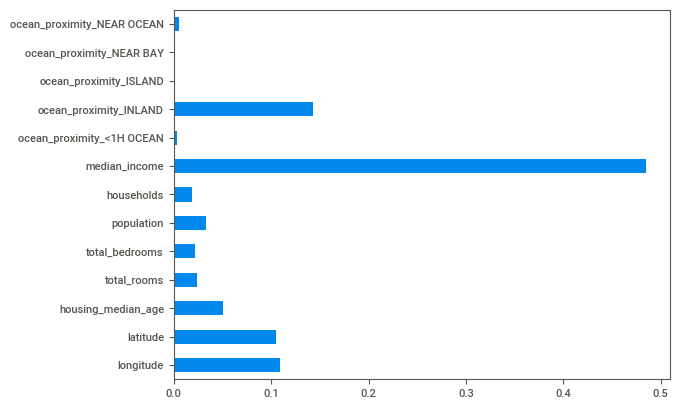

In [ ]:
# RF Model
rf_modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(X_train, y_train)

# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_))
print('OOB MAE score:', mean_absolute_error(y_train, rf_modelWithoob.oob_prediction_))

# Obtain feature importances and plot them
importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [200, 400, 600, 800],
    'max_depth': [2, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    }

In [ ]:
scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error', 'MAE' : 'neg_mean_absolute_error'}
print(scoring)

{'R2': 'r2', 'MSE': 'neg_mean_squared_error', 'MAE': 'neg_mean_absolute_error'}


In [ ]:
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [2, 7, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800]},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

In [ ]:
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('Test MAE score:', mean_absolute_error(y_test, y_pred))

Test R2 score: 0.7884508295106634
Test MSE score: 2892973151.5803156
Test MAE score: 36195.29262353206


In [ ]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('Best MAE score:', abs(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}
Best R2 score: 0.7879059067635606
Best MSE score: 2803473999.3999624
Best MAE score: 35831.511474048646


longitude                     0.096657
latitude                      0.090393
housing_median_age            0.038460
total_rooms                   0.008446
total_bedrooms                0.009879
population                    0.013224
households                    0.006975
median_income                 0.555714
ocean_proximity_<1H OCEAN     0.003163
ocean_proximity_INLAND        0.170915
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.000452
ocean_proximity_NEAR OCEAN    0.005723
dtype: float64


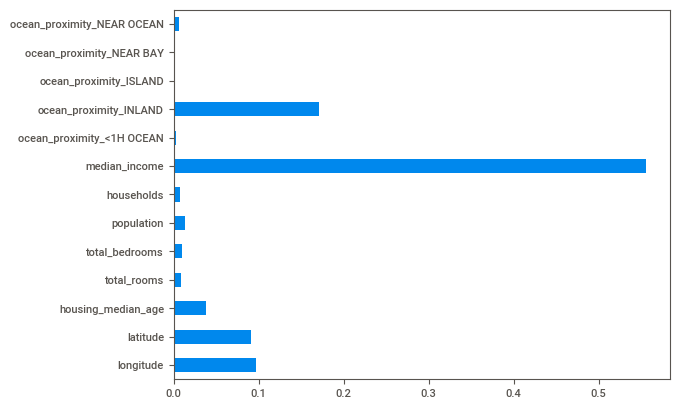

In [ ]:
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print(importances)
importances.plot(kind='barh')
plt.show()

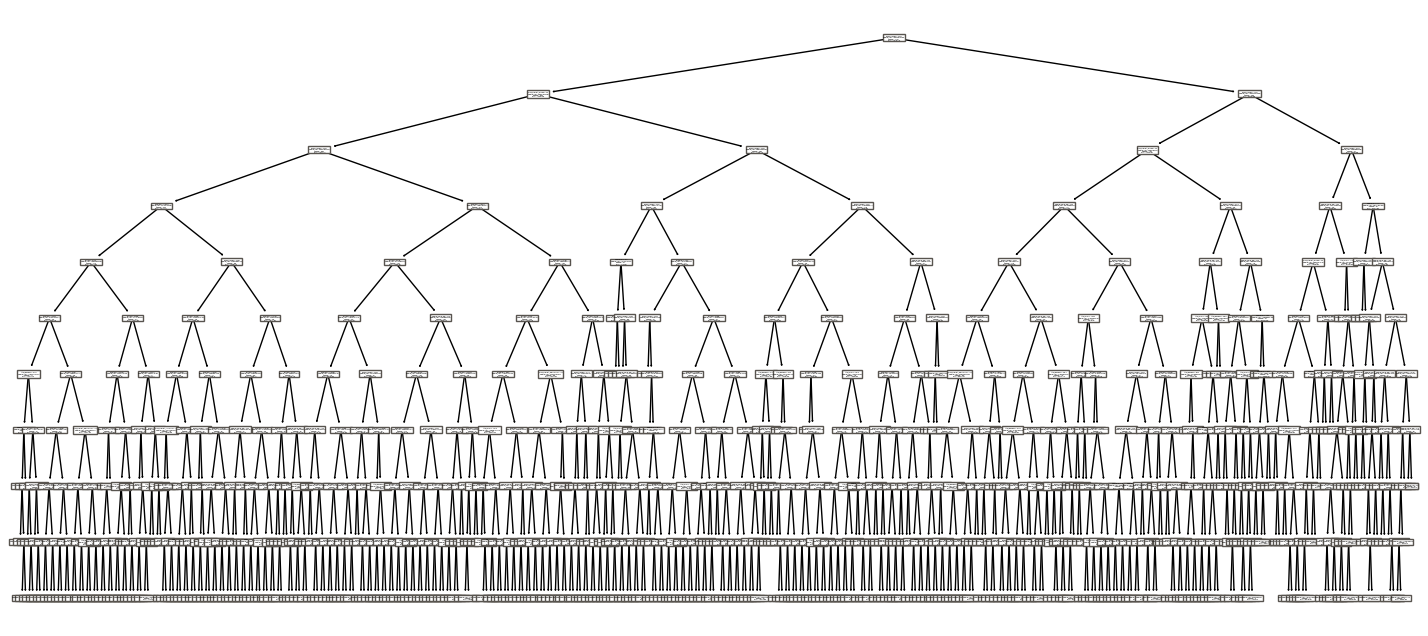

In [ ]:

from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(18, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

In [ ]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             param_grid={'max_depth': [2, 7, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800]},
             refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2'})

Test R2 score: 0.7884508295106634
Test MSE score: 2892973151.5803156
Test MAE score: 36195.29262353206


Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}
Best R2 score: 0.7879059067635606
Best MSE score: 2803473999.3999624
Best MAE score: 35831.511474048646


OOB score: 0.7906326900984049
OOB MSE score: 2771369630.2433066
OOB MAE score: 35590.74470786697
OOB R2 score: 0.7906326900984049


Feature importances based on OOB:
longitude                     0.096657
latitude                      0.090393
housing_median_age            0.038460
total_rooms                   0.008446
total_bedrooms                0.009879
population                    0.013224
households                    0.006975
median_income                 0.555714
ocean_proximity_<1H OCEAN     0.003163
ocean_proximity_INLAND        0.170915
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.000452
ocean_proximity_NEAR OCEAN    0.005723
dtype: f

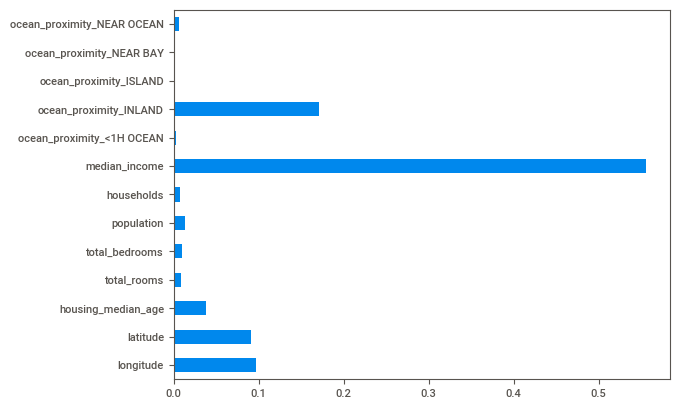

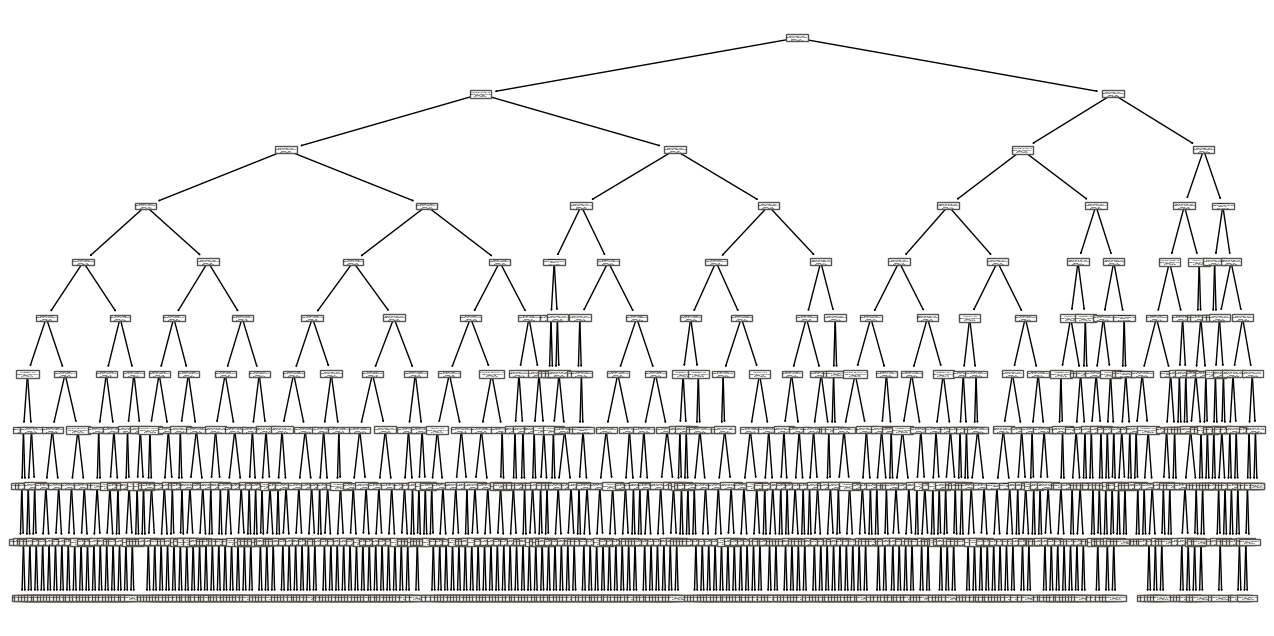

In [ ]:

# Evaluate model on test set
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('Test MAE score:', mean_absolute_error(y_test, y_pred))
print('\n')

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('Best MAE score:', abs(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))

print('\n')

# Display OOB score and related statistics
print('OOB score:', grid_search.best_estimator_.oob_score_)
oob_predictions = grid_search.best_estimator_.oob_prediction_
print('OOB MSE score:', mean_squared_error(y_train, oob_predictions))
print('OOB MAE score:', mean_absolute_error(y_train, oob_predictions))
print('OOB R2 score:', r2_score(y_train, oob_predictions))
print('\n')

# Obtain feature importances and plot them
importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances based on OOB:')
print(importances_oob)
importances_oob.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
Best R2 score: 0.7877966370684044
Best MSE score: 2804953244.0690184
Best MAE score: 35839.76838610445


Test R2 score: 0.7882317666707419
Test MSE score: 2895968875.519747
Test MAE score: 36214.237769185376


Feature importances:
longitude                     0.096703
latitude                      0.090552
housing_median_age            0.038033
total_rooms                   0.008473
total_bedrooms                0.009937
population                    0.013207
households                    0.006939
median_income                 0.555976
ocean_proximity_<1H OCEAN     0.002921
ocean_proximity_INLAND        0.170937
ocean_proximity_ISLAND        0.000000
ocean_proximity_NEAR BAY      0.000485
ocean_proximity_NEAR OCEAN    0.005838
dtype: float64


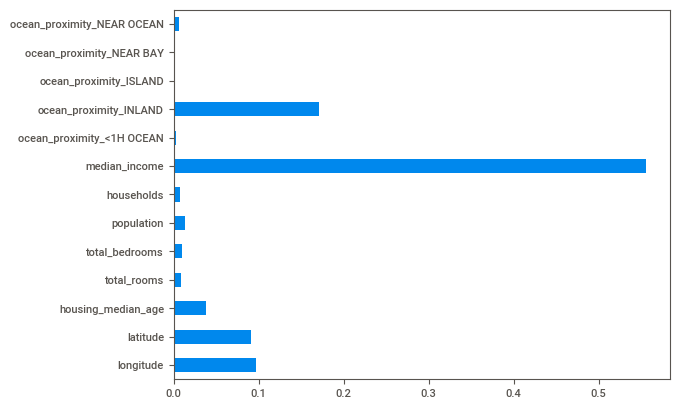

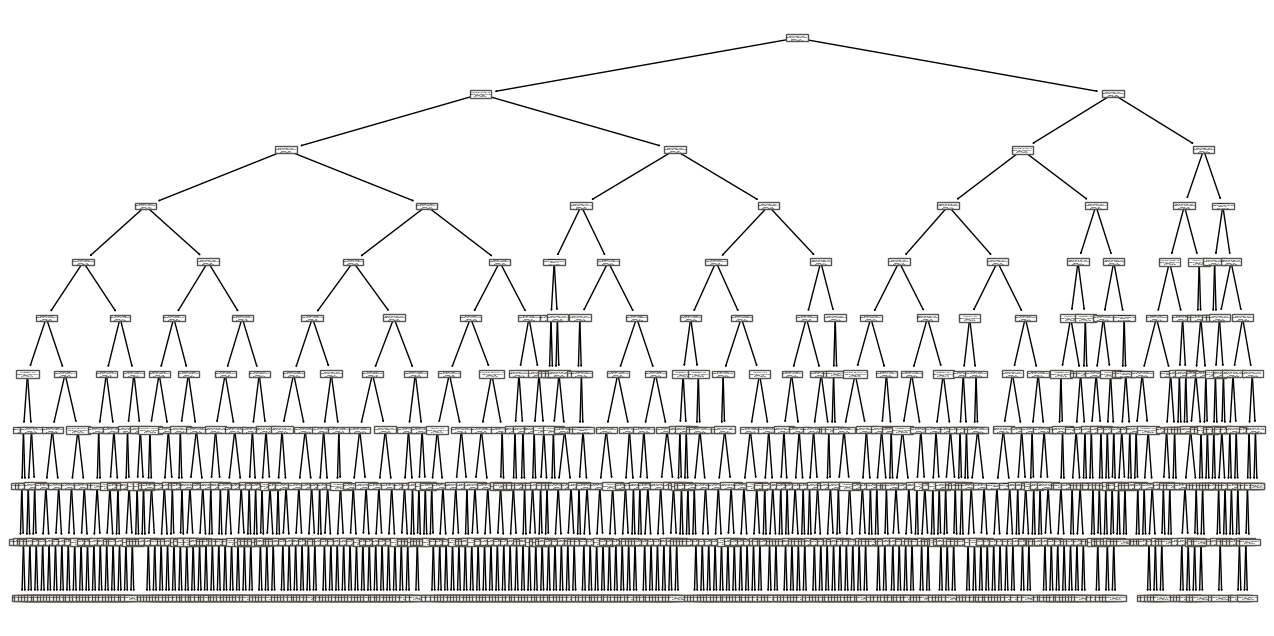

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Perform random search with cross-validation; hence, create random search object
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=20, cv=5, scoring=scoring, refit='R2')

# fit the random search object to the train data
random_search.fit(X_train, y_train)

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', random_search.best_params_)
print('Best R2 score:', random_search.best_score_)
print('Best MSE score:', abs(random_search.cv_results_['mean_test_MSE'][random_search.best_index_]))
print('Best MAE score:', abs(random_search.cv_results_['mean_test_MAE'][random_search.best_index_]))
print('\n')

# fit the model with the best parameters on the entire training set
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = best_model.predict(X_test)
print("Test R2 score:", r2_score(y_test, y_pred))
print("Test MSE score:", mean_squared_error(y_test, y_pred))
print("Test MAE score:", mean_absolute_error(y_test, y_pred))
print('\n')

# Obtain feature importances and plot them
importances = pd.Series(random_search.best_estimator_.feature_importances_, index=X.columns)
print('Feature importances:')
print(importances)
importances.plot(kind='barh')
plt.show()

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(random_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

Text(0.5, 1.0, 'MAE for various regression algorithms')

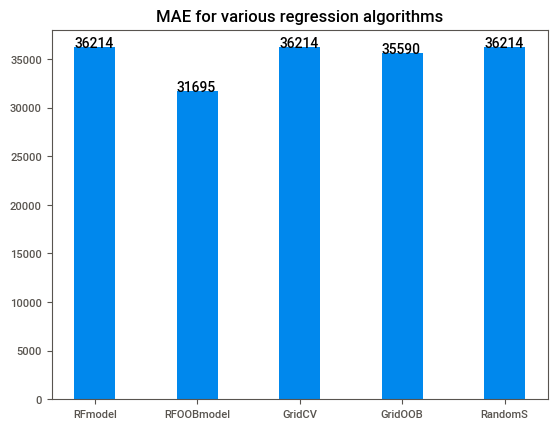

In [ ]:
# Let's plot the mean absolute error of all the algorithms we have tried
rf_model = mean_absolute_error(y_test, y_pred)
rfoob_model = mean_absolute_error(y_train, rf_modelWithoob.oob_prediction_)
grid_cv = mean_absolute_error(y_test, y_pred)
grid_oob = mean_absolute_error(y_train, oob_predictions)
random_search = mean_absolute_error(y_test, y_pred)
errors = [rf_model, rfoob_model, grid_cv , grid_oob, random_search]
labels = ["RFmodel", "RFOOBmodel", "GridCV", "GridOOB", "RandomS"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MAE for various regression algorithms")

Text(0.5, 1.0, 'MSE for various regression algorithms')

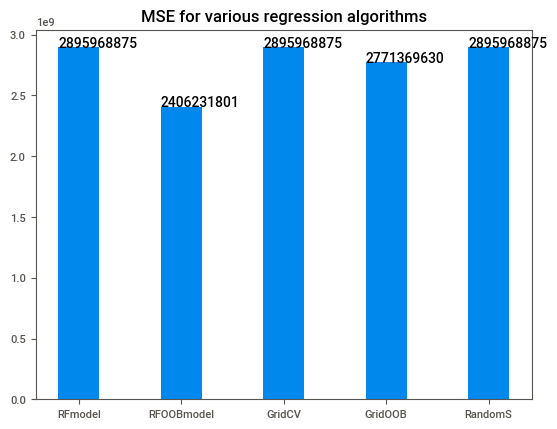

In [ ]:
# Let's plot the mean squared error of all the algorithms we have tried
rf_model = mean_squared_error(y_test, y_pred)
rfoob_model = mean_squared_error(y_train, rf_modelWithoob.oob_prediction_)
grid_cv = mean_squared_error(y_test, y_pred)
grid_oob = mean_squared_error(y_train, oob_predictions)
random_search = mean_squared_error(y_test, y_pred)
errors = [rf_model, rfoob_model, grid_cv , grid_oob, random_search]
labels = ["RFmodel", "RFOOBmodel", "GridCV", "GridOOB", "RandomS"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("MSE for various regression algorithms")

Text(0.5, 1.0, 'R2 for various regression algorithms')

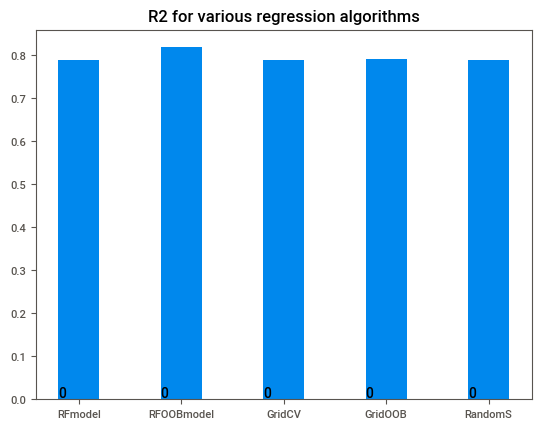

In [ ]:
# Let's plot the R2 of all the algorithms we have tried
rf_model = r2_score(y_test, y_pred)
rfoob_model = r2_score(y_train, rf_modelWithoob.oob_prediction_)
grid_cv = r2_score(y_test, y_pred)
grid_oob = r2_score(y_train, oob_predictions)
random_search = r2_score(y_test, y_pred)
errors = [rf_model, rfoob_model, grid_cv , grid_oob, random_search]
labels = ["RFmodel", "RFOOBmodel", "GridCV", "GridOOB", "RandomS"]
bars = plt.bar(labels, errors, width=0.4)
for bar in bars:
    yval = int(bar.get_height())
    plt.text(bar.get_x(), yval + .005, yval)
#plt.grid()
plt.title("R2 for various regression algorithms")